<a href="https://colab.research.google.com/github/saranya282/lab-programs/blob/main/labprograms2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get "students_placement_data.csv" data from shorturl.at/pIQ47 Create a model to predict if a student will be placed on not based on his/her "Gender","Section","SSC Percentage","inter_Diploma_percentage", "B.Tech_percentage","Backlogs","registered_for_ Placement_Training" Using Decision tree.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_csv("students_placement_data.csv")
data

,Roll No,Gender,Section,SSC Percentage,inter_Diploma_percentage,B.Tech_percentage,Backlogs,registered_for_ Placement_Training,placement status
0,1,M,A,87.3,65.30,40.00,18,NO,Not placed
1,2,F,A,89.0,92.40,71.45,0,yes,Placed
2,3,F,A,67.0,68.00,45.26,13,yes,Not placed
3,4,M,A,71.0,70.40,36.47,17,yes,Not placed
4,5,M,A,NaN,65.50,42.52,17,yes,Not placed
...,...,...,...,...,...,...,...,...,...
112,113,M,B,81.1,78.60,35.84,16,NO,Not placed
113,114,M,B,81.3,85.12,68.50,0,NO,Not placed
114,115,M,B,83.5,89.90,76.30,0,NO,Not placed
115,116,M,B,85.5,90.63,74.50,0,NO,Not placed


In [3]:
data.isna().any()

Roll No                               False
Gender                                False
Section                               False
SSC Percentage                         True
inter_Diploma_percentage              False
B.Tech_percentage                     False
Backlogs                              False
registered_for_ Placement_Training     True
placement status                      False
dtype: bool

In [4]:
data["SSC Percentage"]=data["SSC Percentage"].replace(to_replace=np.nan,value=data["SSC Percentage"].mean())

In [5]:
data["registered_for_ Placement_Training"]=data["registered_for_ Placement_Training"].replace(to_replace=np.nan,value=data["registered_for_ Placement_Training"].mode()[0])

In [6]:
data.isna().any()

Roll No                               False
Gender                                False
Section                               False
SSC Percentage                        False
inter_Diploma_percentage              False
B.Tech_percentage                     False
Backlogs                              False
registered_for_ Placement_Training    False
placement status                      False
dtype: bool

In [10]:
data["Gender"]=data["Gender"].map({'M':0,'F':1})
data["Section"]=data["Section"].map({'A':0,'B':1})
data["registered_for_ Placement_Training"]=data["registered_for_ Placement_Training"].map({'NO':0,'yes':1})

In [11]:
X=data[["Gender","Section","SSC Percentage","inter_Diploma_percentage","B.Tech_percentage","Backlogs","registered_for_ Placement_Training"]]

In [12]:
Y=data["placement status"]

In [14]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [16]:
model_DT = DecisionTreeClassifier() # Create Decision Tree classifer object
model_DT = model_DT.fit(X_train,Y_train) # Build the model using training data
y_predict_DT = model_DT.predict(X_test)

In [18]:
Actual_predicted_DT=pd.DataFrame({'predicted':y_predict_DT, 'Actual':Y_test})
Actual_predicted_DT.head()

,predicted,Actual
69,Not placed,Not placed
46,Not placed,Placed
58,Placed,Placed
114,Placed,Not placed
73,Not placed,Placed


In [20]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
confusion_matrix(Y_test, y_predict_DT),
columns=['Not placed Predicted', 'placed predicted'],
index=['Not placed', 'placed'])

,Not placed Predicted,placed predicted
Not placed,11,2
placed,3,8


In [23]:
print("Accuracy of decison tree is " ,metrics.accuracy_score(Y_test, y_predict_DT)*100)
print("Recall of decision tree is",metrics.recall_score(Y_test, y_predict_DT, pos_label
="Placed"))
print("Precision of decision tree is",metrics.precision_score(Y_test, y_predict_DT, pos_label="Placed"))
print("f1_score of decision tree is",metrics.f1_score(Y_test, y_predict_DT, pos_label=
"Placed"))

Accuracy of decison tree is  79.16666666666666
Recall of decision tree is 0.7272727272727273
Precision of decision tree is 0.8
f1_score of decision tree is 0.761904761904762


6) Get "students_placement_data.csv" data from shorturl.at/pIQ47
Create a model to predict if a student will be placed on not based on his/her "Gender","Section","SSC Percentage","inter_Diploma_percentage", "B.Tech_percentage","Backlogs","registered_for_ Placement_Training" Using Logistic regression.

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [25]:
data=pd.read_csv("students_placement_data.csv")
data

,Roll No,Gender,Section,SSC Percentage,inter_Diploma_percentage,B.Tech_percentage,Backlogs,registered_for_ Placement_Training,placement status
0,1,M,A,87.3,65.30,40.00,18,NO,Not placed
1,2,F,A,89.0,92.40,71.45,0,yes,Placed
2,3,F,A,67.0,68.00,45.26,13,yes,Not placed
3,4,M,A,71.0,70.40,36.47,17,yes,Not placed
4,5,M,A,NaN,65.50,42.52,17,yes,Not placed
...,...,...,...,...,...,...,...,...,...
112,113,M,B,81.1,78.60,35.84,16,NO,Not placed
113,114,M,B,81.3,85.12,68.50,0,NO,Not placed
114,115,M,B,83.5,89.90,76.30,0,NO,Not placed
115,116,M,B,85.5,90.63,74.50,0,NO,Not placed


In [26]:
data["SSC Percentage"]=data["SSC Percentage"].replace(to_replace=np.nan,value=data["SSC Percentage"].mean())

In [27]:
data["registered_for_ Placement_Training"]=data["registered_for_ Placement_Training"].replace(to_replace=np.nan,value=data["registered_for_ Placement_Training"].mode()[0])

In [28]:
data.isna().any()

Roll No                               False
Gender                                False
Section                               False
SSC Percentage                        False
inter_Diploma_percentage              False
B.Tech_percentage                     False
Backlogs                              False
registered_for_ Placement_Training    False
placement status                      False
dtype: bool

In [29]:
data["Gender"]=data["Gender"].map({'M':0,'F':1})
data["Section"]=data["Section"].map({'A':0,'B':1})
data["registered_for_ Placement_Training"]=data["registered_for_ Placement_Training"].map({'NO':0,'yes':1})

In [30]:
X=data[["Gender","Section","SSC Percentage","inter_Diploma_percentage","B.Tech_percentage","Backlogs","registered_for_ Placement_Training"]]

In [31]:
Y=data["placement status"]

In [32]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [35]:
model = LogisticRegression(max_iter=2000) # The model needed 2000 iterations to converge. (To get the optimal parameters)
model = model.fit(X_train,Y_train)
y_predict_lr = model.predict(X_test)

In [37]:
Actual_predicted=pd.DataFrame({'predicted':y_predict_lr, 'Actual':Y_test})
Actual_predicted.head()

,predicted,Actual
69,Not placed,Not placed
46,Not placed,Placed
58,Placed,Placed
114,Placed,Not placed
73,Not placed,Placed


In [39]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
confusion_matrix(Y_test, y_predict_lr),
columns=['Not placed Predicted', 'placed predicted'],
index=['Not placed', 'placed'])

,Not placed Predicted,placed predicted
Not placed,11,2
placed,3,8


In [43]:
print("Accuracy of Logistic Regresssion is ",metrics.accuracy_score(Y_test, y_predict_lr)*100)
print("recall of Logistic Regresssion is",metrics.recall_score(Y_test, y_predict_lr, pos_label="Placed"))
print("Precision of Logistic Regresssion is",metrics.precision_score(Y_test, y_predict_lr, pos_label="Placed"))
print("f1_score of Logistic Regresssion is",metrics.f1_score(Y_test, y_predict_lr, pos_label="Placed"))

Accuracy of Logistic Regresssion is  79.16666666666666
recall of Logistic Regresssion is 0.7272727272727273
Precision of Logistic Regresssion is 0.8
f1_score of Logistic Regresssion is 0.761904761904762


Get "hclustdata.csv" data from shorturl.at/pIQ47
Create clusters using K-Means, Consider “inter_diploma percentage” and “B.Tech percentages” as features.

In [44]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [45]:
data=pd.read_csv("hclustdata (1).csv")
data

,Na0e,Gender,SSC Perc\nentage,inter/Diplo0a perc,B.Tech perc,Back\nlogs
0,ARIGELA AVINASH,0,87.3,65.30,40.000000,18
1,BALADARI KEERTHANA,1,89.0,92.40,71.450000,0
2,BAVIRISETTI PRAVALIKA,1,67.0,68.00,45.260000,13
3,BODDU SAI BABA,0,71.0,70.40,36.470000,17
4,BONDAPALLISRINIVAS,0,67.0,65.50,42.520000,17
...,...,...,...,...,...,...
112,THEETLA PRE0 KU0AR,0,81.1,78.60,35.833333,16
113,THOTA BRAH0A,0,81.3,85.12,68.500000,0
114,THOTA 0AHESH,0,83.5,89.90,76.300000,0
115,THOTA VISHNU,0,85.5,90.63,74.500000,0


In [46]:
data.describe()

,Gender,SSC Perc\nentage,inter/Diplo0a perc,B.Tech perc,Back\nlogs
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.418803,80.238889,80.781453,62.943111,4.111111
std,0.495485,8.882000,11.271626,12.064580,6.335148
min,0.000000,47.800000,52.200000,31.200000,0.000000
25%,0.000000,75.500000,73.400000,54.181818,0.000000
50%,0.000000,82.300000,83.600000,64.360000,0.000000
75%,1.000000,87.000000,90.000000,72.570000,7.000000
max,1.000000,93.660000,96.900000,88.100000,25.000000


In [47]:
d1=data.iloc[:,[3,4]].values

In [48]:
type(d1)

numpy.ndarray

Text(0, 0.5, 'B.Tech Percentage')

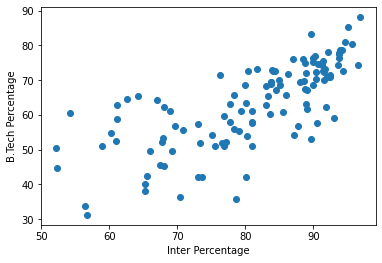

In [49]:
plt.scatter(d1[:,0],d1[:,1])
plt.xlabel("Inter Percentage")
plt.ylabel("B.Tech Percentage")

In [56]:
cluste=KMeans(n_clusters=2)

In [57]:
model=cluste.fit_predict(d1)
model

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0], dtype=int32)

In [58]:
cluste.cluster_centers_

array([[88.23352113, 70.41633803],
       [69.27934783, 51.40834781]])

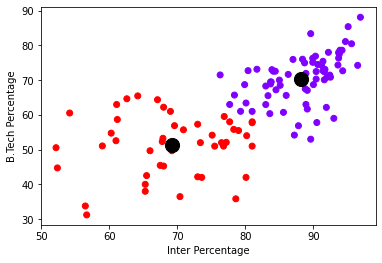

In [60]:
plt.scatter(d1[:,0],d1[:,1],c=model,cmap='rainbow')
plt.xlabel("Inter Percentage")
plt.ylabel("B.Tech Percentage")
centers = cluste.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200)

In [63]:
data["clusters"]=pd.Series(model)
data

,Na0e,Gender,SSC Perc\nentage,inter/Diplo0a perc,B.Tech perc,Back\nlogs,clusters
0,ARIGELA AVINASH,0,87.3,65.30,40.000000,18,1
1,BALADARI KEERTHANA,1,89.0,92.40,71.450000,0,0
2,BAVIRISETTI PRAVALIKA,1,67.0,68.00,45.260000,13,1
3,BODDU SAI BABA,0,71.0,70.40,36.470000,17,1
4,BONDAPALLISRINIVAS,0,67.0,65.50,42.520000,17,1
...,...,...,...,...,...,...,...
112,THEETLA PRE0 KU0AR,0,81.1,78.60,35.833333,16,1
113,THOTA BRAH0A,0,81.3,85.12,68.500000,0,0
114,THOTA 0AHESH,0,83.5,89.90,76.300000,0,0
115,THOTA VISHNU,0,85.5,90.63,74.500000,0,0


In [64]:
l=[]
K=range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(d1)
  l.append(kmeanModel.inertia_)

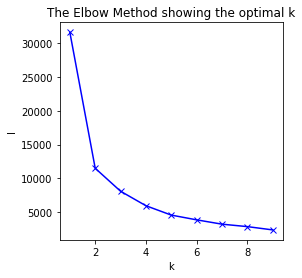

In [65]:
plt.figure(figsize=(4,4))
plt.plot(K, l, 'bx-') # "bx-" is used to mark the points"
plt.xlabel('k')
plt.ylabel('l')
plt.title('The Elbow Method showing the optimal k')
plt.show()